## 对ID和OOD样本进行softmax可视化以及标准差分析

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import Model
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [1]:
from utils import *
from tqdm import tqdm
ood2label = {True: 0, False: 1}
data_test_1 = pd.read_csv('data_test_1.csv')
data_ood = data_test_1[data_test_1['id']==False]
path_ood = data_ood['name'].to_list()
model_random = keras.models.load_model('../model/malconv_random.h5')

batch_size = 100
for idx in tqdm(range(0, len(path_ood), batch_size)):
    code_tmp = codes_loader(path_ood[idx, idx + batch_size])
    logits_tmp = model_random.predict(code_tmp)
    logits_ood = logits_tmp if idx == 0 else np.concatenate((logits_ood, logits_tmp), axis = 0)

# model_random = keras.models.load_model('../model/malconv_split.h5')
# logits_ood = model_random.predict(codes_odd)
soft_ood = keras.backend.softmax(logits_ood)
soft_ood = soft_ood.numpy()
soft_ood = np.max(soft_ood, axis=1)

KeyError: 'id'

In [3]:
data_id = data_test_1[data_test_1['id']==True]
path_id = data_id['name'].to_list()
codes_id = codes_loader(path_id)

model_random = keras.models.load_model('../model/malconv_random.h5')
logits_id = model_random.predict(codes_id)
soft_id = keras.backend.softmax(logits_id)
soft_id = soft_id.numpy()
soft_id = np.max(soft_id, axis=1)

100%|██████████| 1901/1901 [00:10<00:00, 174.75it/s]


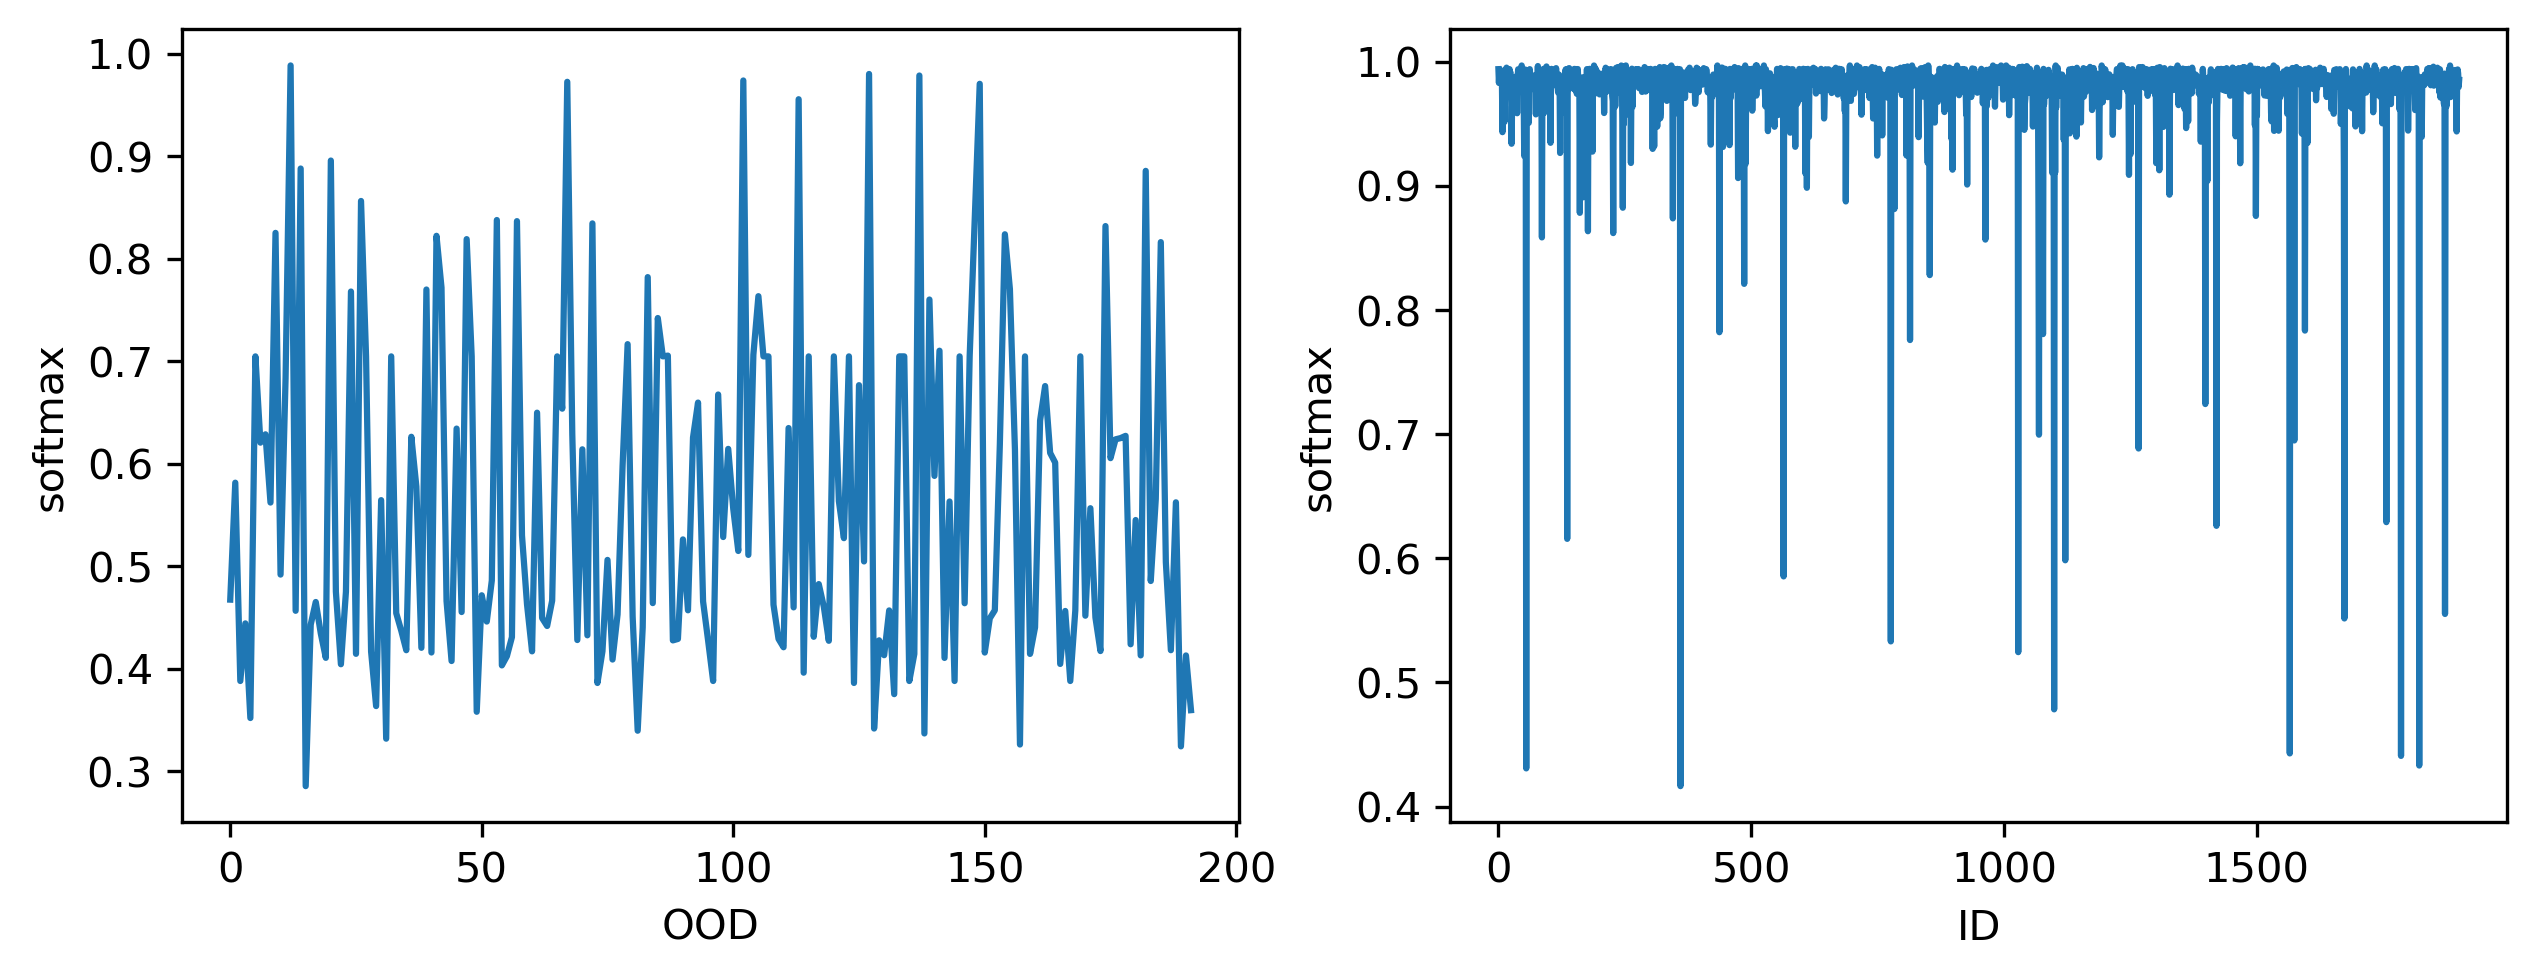

In [10]:
data_id = pd.DataFrame(soft_id, columns=['id'])
data_ood = pd.DataFrame(soft_ood, columns=['id'])

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 3.5),dpi=300)
ax = fig.add_subplot(121)
sns.lineplot(data=data_ood['id'], ax=ax)
plt.ylabel("softmax")
plt.xlabel("OOD")

ax = fig.add_subplot(122)
sns.lineplot(data=data_id['id'], ax=ax)
plt.ylabel("softmax")
plt.xlabel("ID")
plt.savefig("./figures/entropy_analyse.png")

In [11]:
print(np.std(soft_id))
print(np.std(soft_ood))

0.046847284
0.16519478
